# 다중 로지스틱 회귀 (Multiple Logistic Regression)
## 합격 여부 예측 모델
* 독립변수 - GRE, GPA, RANK
* 종속변수 - 합격여부

In [106]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings

# warning off
warnings.filterwarnings(action='ignore')

## Data Preprocessing

In [107]:
df = pd.read_csv('admission.csv')
display(df)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


### 결측치

In [108]:
# 결측치 확인
print(df.isnull().sum())

admit    0
gre      0
gpa      0
rank     0
dtype: int64


### 이상치 처리 (Z-score)
#### Boxplot을 이용하여 이상치 확인

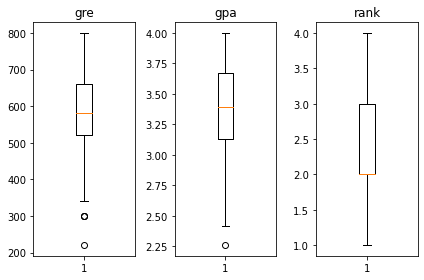

In [83]:
fig = plt.figure()
fig_gre = fig.add_subplot(1,3, 1)
fig_gpa = fig.add_subplot(1,3, 2)
fig_rank = fig.add_subplot(1,3, 3)

fig_gre.boxplot(df['gre'])
fig_gre.set_title('gre')

fig_gpa.boxplot(df['gpa'])
fig_gpa.set_title('gpa')

fig_rank.boxplot(df['rank'])
fig_rank.set_title('rank')

fig.tight_layout()

#### 연습용이니까 이상치 제거
위의 이상치들은 실제 데이터이므로 현업에서는 제거를 하지 않는 쪽으로 갈 것 같다.

In [109]:
zscore_threshold = 2.0 # 2.0 이하로 설정하는 것이 optimal 하다.

for col in df.columns:
    outlier = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    print(outlier)
    
    df = df.loc[~df[col].isin(outlier)]

display(df) # 382 rows × 4 columns

Series([], Name: admit, dtype: int64)
71     300
100    340
119    340
179    300
216    340
304    220
315    300
316    340
Name: gre, dtype: int64
17     2.56
40     2.42
48     2.48
156    2.52
176    2.62
289    2.26
294    2.55
372    2.42
384    2.62
397    2.63
Name: gpa, dtype: float64
Series([], Name: rank, dtype: int64)


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
394,1,460,3.99,3
395,0,620,4.00,2
396,0,560,3.04,3
398,0,700,3.65,2


### Training Data Set
* Scikit-learn 용도
* 결측치, 이상치만 처리된 데이터

In [110]:
x_data = df.drop('admit', axis=1, inplace=False).values # 2차원 ndarray 복사본 
t_data = df['admit'].values.reshape(-1,1) # Series -> 1차원 ndarray 벡터 -> 2차원 행렬

print(x_data)
print(t_data)

[[380.     3.61   3.  ]
 [660.     3.67   3.  ]
 [800.     4.     1.  ]
 ...
 [560.     3.04   3.  ]
 [700.     3.65   2.  ]
 [600.     3.89   3.  ]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]


### 정규화 (Min-Max)
* python
* tenforflow

In [111]:
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
norm_x_data = scaler_x.transform(x_data)

display(norm_x_data)

array([[0.04545455, 0.71111111, 0.66666667],
       [0.68181818, 0.75555556, 0.66666667],
       [1.        , 1.        , 0.        ],
       ...,
       [0.45454545, 0.28888889, 0.66666667],
       [0.77272727, 0.74074074, 0.33333333],
       [0.54545455, 0.91851852, 0.66666667]])

## Python

In [112]:
def numerical_derivative(f, x):
    # f: cross entropy, x: [W1, W2, W3, b]
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        it.iternext()
    
    return derivative_x

# training data set: norm_x_data, t_data

# W, b
W = np.random.rand(3,1)
b = np.random.rand(1)

# loss function
def loss_func(input_obj): # [W1 W2 W3 b]
    input_W = input_obj[:-1].reshape(-1,1) # 3행 1열
    input_b = input_obj[-1:]
    
    # linear regression model
    z = np.dot(norm_x_data, input_W) + input_b
    
    # logistic regression model
    y = 1 / (1 + np.exp(-1 * z))
    
    # cross entropy
    delta = 1e-7
    log_loss = -np.sum(t_data*np.log(y+delta) + (1 - t_data)*np.log(1 - y+delta))
    
    return log_loss

# learning rate
learning_rate = 1e-4

# learning - gradient descent algorithm
for step in range(300000):
    # [W1 W2 W3 b]
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    
    # learning_rate * 편미분
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    # W, b 갱신
    W = W - derivative_result[:-1].reshape(-1,1) # 3행 1열
    b = b - derivative_result[-1:]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W: {}, b: {}, loss: {}'.format(W.ravel(), b, loss_func(input_param)))

W: [0.8535424  0.13805928 0.23890212], b: [0.71021549], loss: 437.3074662776721
W: [ 1.07521955  1.12939476 -1.61510775], b: [-1.25306746], loss: 221.21560007990126
W: [ 1.07526591  1.12942595 -1.61508268], b: [-1.25312616], loss: 221.21560006866997
W: [ 1.07526592  1.12942595 -1.61508268], b: [-1.25312617], loss: 221.21560006866997
W: [ 1.07526592  1.12942595 -1.61508268], b: [-1.25312617], loss: 221.21560006866997
W: [ 1.07526592  1.12942595 -1.61508268], b: [-1.25312617], loss: 221.21560006866997
W: [ 1.07526592  1.12942595 -1.61508268], b: [-1.25312617], loss: 221.21560006866997
W: [ 1.07526592  1.12942595 -1.61508268], b: [-1.25312617], loss: 221.21560006866997
W: [ 1.07526592  1.12942595 -1.61508268], b: [-1.25312617], loss: 221.21560006866997
W: [ 1.07526592  1.12942595 -1.61508268], b: [-1.25312617], loss: 221.21560006866997


### Python Prediction
* GRE: 600
* GPA: 3.8
* RANK: 1

In [113]:
def logistic_predict(x):
    z = np.dot(x, W) + b
    y = 1 / (1 + np.exp(-1 * z))
    
    if y < 0.5:
        result = 0
    else:
        result = 1
        
    return result, y

predict_data = np.array([[600, 3.8, 1]])
scaled_predict_data = scaler_x.transform(predict_data)

result_python = logistic_predict(scaled_predict_data)
print(result_python) # (합격여부, 합격확률)

(1, array([[0.57333869]]))


## Tensorflow

In [114]:
# training data set: norm_x_data, t_data

# X, T
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# W, b
W = tf.Variable(tf.random.normal([3,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# model
linear_model = tf.matmul(X, W) + b
H = tf.sigmoid(linear_model)

# log loss
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=linear_model, labels=T))

# gradient descent algorithm
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# learning
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(300000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss], feed_dict={X: norm_x_data, T: t_data})
    
    if step % 30000 == 0:
        print('W: {}, b: {}, loss: {}'.format(W_val.ravel(), b_val, loss_val))

W: [ 1.5168793  0.6140489 -1.3132479], b: [0.43858263], loss: 0.9228240251541138
W: [ 1.1516572   0.25317657 -1.6401677 ], b: [-0.2331678], loss: 0.6135178804397583
W: [ 1.0487156  0.17181   -1.7276431], b: [-0.43620571], loss: 0.5887900590896606
W: [ 1.0199159   0.16774003 -1.7539514 ], b: [-0.5102186], loss: 0.58623206615448
W: [ 1.012842    0.18578877 -1.7626314 ], b: [-0.5459838], loss: 0.5856351852416992
W: [ 1.012417    0.21006644 -1.7659119 ], b: [-0.569604], loss: 0.5852476954460144
W: [ 1.0139297   0.23574261 -1.7659119 ], b: [-0.5889385], loss: 0.584901750087738
W: [ 1.0173526   0.26096645 -1.7659119 ], b: [-0.60681987], loss: 0.5845784544944763
W: [ 1.0208498  0.2855481 -1.7659119], b: [-0.62470126], loss: 0.5842703580856323
W: [ 1.0229455   0.30962875 -1.7659119 ], b: [-0.64089644], loss: 0.5839857459068298


### Tensorflow Prediction
* GRE: 600
* GPA: 3.8
* RANK: 1

In [115]:
predict_data = np.array([[600, 3.8, 1]])
scaled_predict_data = scaler_x.transform(predict_data)
result_tensorflow = sess.run(H, feed_dict={X: scaled_predict_data})

print(result_tensorflow) # [[0.54632527]] 확률로 합격

[[0.54632527]]


## Scikit-learn 

In [95]:
# training datat set: x_data, t_data
# model
model = linear_model.LogisticRegression()

# learning
model.fit(x_data, t_data.ravel())

# prediction
result = model.predict(predict_data)
result_proba = model.predict_proba(predict_data)

print('W: {}, b: {}, 확률: {}'.format(model.coef_, model.intercept_, result_proba))
print(result) # 1: 합격

W: [[ 0.00253619  0.74560063 -0.52891027]], b: [-3.57439949], 확률: [[0.43740782 0.56259218]]
[1]
